<a href="https://colab.research.google.com/github/mahdi259/mmch259/blob/main/BASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Converting audio files to signal_data.npy

In [6]:
from scipy.io import wavfile
samplerate1, data1 = wavfile.read('office_speech_x1.wav')
samplerate2, data2 = wavfile.read('office_speech_x2.wav')
# samplerate3, data3 = wavfile.read('office_speech_x1.wav')
# samplerate4, data4 = wavfile.read('office_speech_x4.wav')
data1 = data1.reshape((-1, 1))
data2 = data2.reshape((-1, 1))
# data3 = data3.reshape((-1, 1))
# data4 = data4.reshape((-1, 1))
# data = np.concatenate((data1, data2, data3, data4), axis=1)
data = np.concatenate((data1, data2), axis=1)
np.save('signal_data.npy', data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
X = np.load('signal_data.npy')

# Normalize data to zero mean and unit variance
# X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)

# Define neural network architecture
input_size = X.shape[1]
hidden_size = 100
output_size = X.shape[1]
model = Sequential()
model.add(Dense(hidden_size, input_dim=input_size, activation='tanh'))
model.add(Dense(output_size, activation='linear'))

# Set training parameters
model.compile(optimizer='adam', loss='mse')

# Train network
history = model.fit(X, X, epochs=10, validation_split=0.2)

# Use network to estimate source signals
S_est = model.predict(X)

# Compute separation matrix using ICA
W = FastICA(n_components=output_size).fit(S_est).mixing_

# Recover source signals
S = W.dot(S_est.T).T

# Plot original and recovered signals
plt.figure()
plt.subplot(2,1,1)
plt.plot(X.T)
plt.title('Original signals')
plt.subplot(2,1,2)
plt.plot(S.T)
plt.title('Recovered signals')
plt.show()

In [13]:
W = FastICA(n_components=output_size).fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


array([[ 1.03345914e-05, -8.07688487e-06],
       [ 8.48103538e-06, -9.98510312e-06],
       [-9.99466109e-07, -5.77221644e-06],
       ...,
       [-2.73185524e-04, -7.00516686e-04],
       [-2.82382873e-05, -3.44842342e-04],
       [ 1.95674738e-05, -4.22418554e-04]])

# Examples of FastICA

In [ ]:
import numpy as np
import pylab as pl
from scipy import signal
from sklearn.decomposition import FastICA

###############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 10, n_samples)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time) # Signal 3 : sawtooth signal
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 2], [0.5, 2, 1.5], [-0.5, 1, 0.5]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations
# Compute ICA

output_size = X.shape[1]
ica = FastICA(n_components=output_size)
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_  # Get estimated mixing matrix
#assert np.allclose(X, np.dot(S_, A_.T))

###############################################################################
# Plot results
pl.figure()
pl.subplot(3, 1, 1)
pl.plot(S)
pl.title('True Sources')
pl.subplot(3, 1, 2)
pl.plot(X)
pl.title('Observations (mixed signal)')
pl.subplot(3, 1, 3)
pl.plot(S_)
pl.title('ICA estimated sources')
pl.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
pl.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


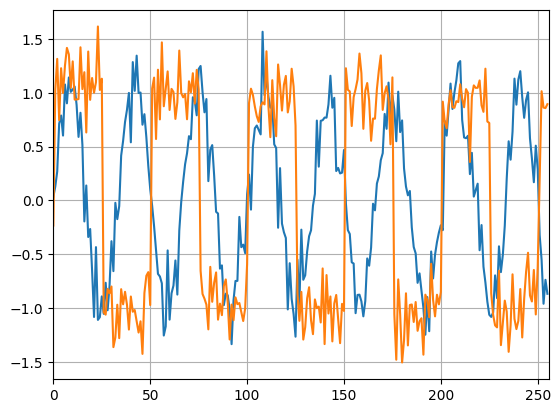

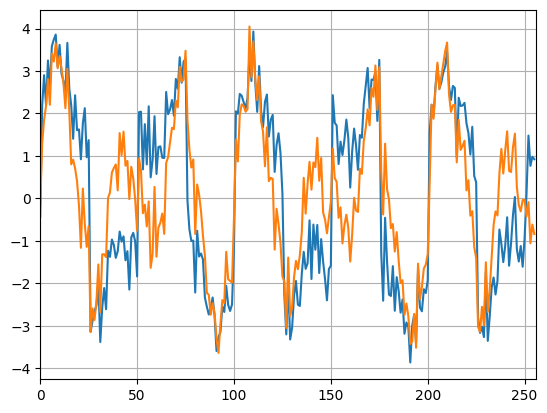

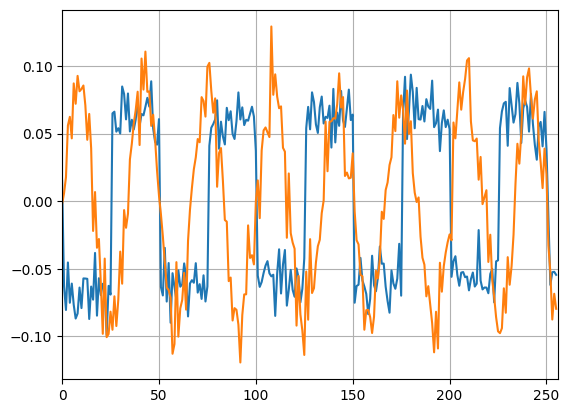

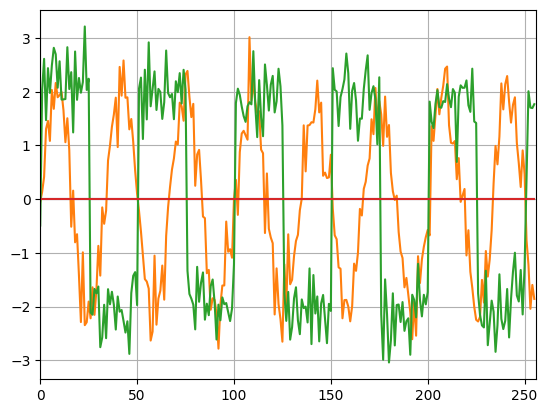

In [14]:
#
#    Testing of FastICA algorithm from sklearn library.
#    Author: tetraquark | tetraquark.ru
#    Article URL (RUS language): http://tetraquark.ru/archives/311
#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Length of the sources signals
n_samples = 256
time = np.linspace(0, 8, n_samples)

# Signal 1 : sinusoidal signal
signal_1 = np.sin(6 * time)  
# add noise to signal 1
signal_1 += 0.2 * np.random.normal(size=signal_1.shape) 
# Signal 2 : square signal
signal_2 = np.sign(np.sin(4 * time))
# add noise to signal 2
signal_2 += 0.2 * np.random.normal(size=signal_2.shape) 

# Plot the sources signals
plt.figure()
plt.grid()
axes = plt.gca()
axes.set_xlim([0, n_samples])
plt.plot(signal_1)
plt.plot(signal_2)

# Create a mixtures from two sources
mix = []
mix.append(signal_1)
mix.append(signal_2)
mix = np.array(mix)
mix = np.dot(mix.T, np.array([[1, 2], [2, 1]]).T)

# Plot the mixtures signals
plt.figure()
plt.grid()
axes = plt.gca()
axes.set_xlim([0, n_samples])
plt.plot(mix)

# Create a FastICA object
ica = FastICA(n_components=2)
# Apply FastICA method and get the independent components matrix S_1
S_1 = ica.fit_transform(mix)
# Copy independent components matrix
S_2 = np.copy(S_1)

# Plot the independent components
plt.figure()
plt.grid()
axes = plt.gca()
axes.set_xlim([0, n_samples])
plt.plot(S_1)

# Nullify independent components of signal 1 and signal 2  
for i in range(len(S_1)):
    S_1[i][0] = 0
    S_2[i][1] = 0

# Restore the sources signals from the independent components matrix (X = S * A)
# S - matrix of independent components
# A - mixing matrix
restored_signal_1 = np.dot(S_1, ica.mixing_)
restored_signal_2 = np.dot(S_2, ica.mixing_)

# Nullify signal 2 values from signal 1 array and vice versa
for i in range(len(restored_signal_1)):
    restored_signal_1[i][0] = 0
    restored_signal_2[i][1] = 0

# Plot the restored signals
plt.figure()
plt.grid()
axes = plt.gca()
axes.set_xlim([0, n_samples])
plt.plot(restored_signal_1)
plt.plot(restored_signal_2)
plt.show()